In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import classification_report

In [8]:
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply PCA to reduce from 4D to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_total_pca = pca.transform(X)

# Print the explained variance by PCA components
print(f"Explained variance by PCA: {pca.explained_variance_ratio_}")

Explained variance by PCA: [0.9191876  0.05549301]


In [7]:
# Step 1: KNN Class Definition
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def score(self, X, y):
        return np.mean(self.predict(X) == y)


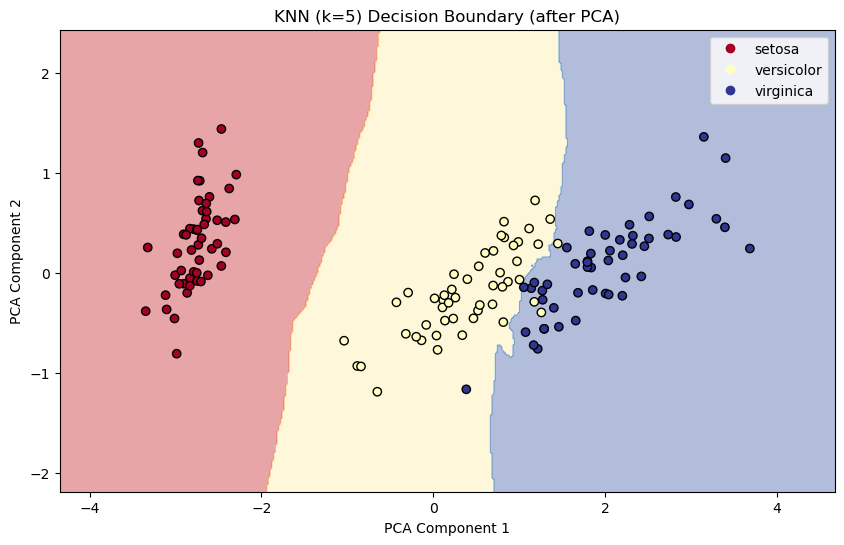

In [11]:
# Plot decision boundaries
h = 0.02
x_min, x_max = X_total_pca[:, 0].min() - 1, X_total_pca[:, 0].max() + 1
y_min, y_max = X_total_pca[:, 1].min() - 1, X_total_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X_total_pca[:, 0], X_total_pca[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KNN (k=5) Decision Boundary (after PCA)")
plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names.tolist())
plt.show()


In [9]:
k_values = [1, 3, 5, 7, 9]  # You can adjust k values here
results = {}

for k in k_values:
    model = KNN(k=k)
    model.fit(X_train_pca, y_train)

    # Accuracy
    accuracy = model.score(X_test_pca, y_test)

    # Classification Report
    y_pred = model.predict(X_test_pca)
    report = classification_report(y_test, y_pred, target_names=iris.target_names)

    # Store the results
    results[k] = {'accuracy': accuracy, 'classification_report': report}

    print(f"\nResults for k = {k}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(report)


Results for k = 1:
Accuracy: 95.56%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45


Results for k = 3:
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Results for k = 5:
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

 

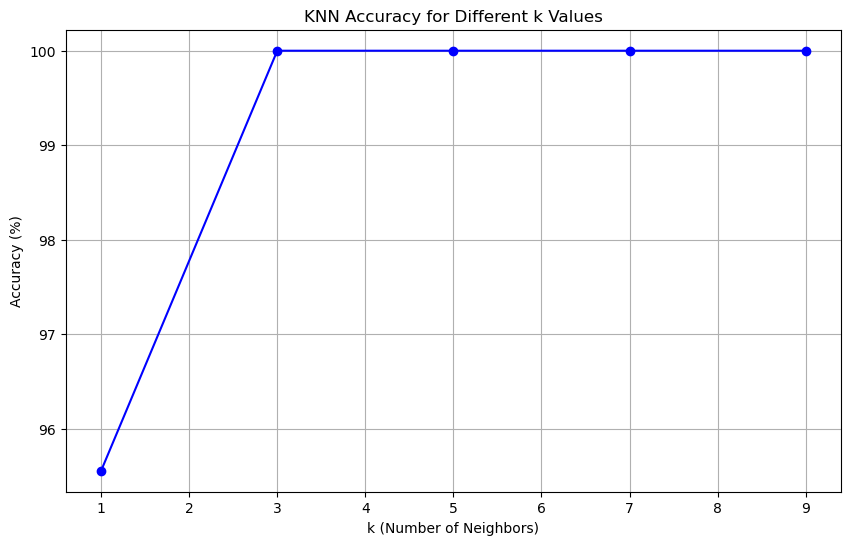

In [10]:
accuracies = [results[k]['accuracy'] * 100 for k in k_values]
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('KNN Accuracy for Different k Values')
plt.grid(True)
plt.show()
